# Instituto Tecnologico de Costa Rica
# Ingenieria en Computacion
# Inteligencia artificial
---
## Tarea Programada 4
## Profesora : Maria Auxiliadora Mora
---
## Estudiantes:
## Kenneth Corrales Lizano 2017151342
## Fabian Vives Castro 2018319257
---
En este trabajo práctico se aplicarán conceptos básicos de aprendizaje automático
utilizando algoritmos no supervisados.

Se realizaran dos ejercicios. El primero consiste en implementar de
cero los algoritmos de K-Means y DBSCAN. El segundo ejercicio consiste en aplicar los
algoritmos de clustering a datos del Organismo de Investigación Judicial (OIJ) integrados
con indicadores socio-económicos generados por el Instituto Nacional de Estadística y
Censos de Costa Rica (INEC) para hacer un estudio muy simplificado sobre la
criminalidad en el país

In [39]:
# Bibliotecas requeridas para el ejercicio
import unidecode
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline


# Ejercicio 1. Implemente de cero los algoritmos K-Means y DBSCAN.

### Generación de datos artificialmente

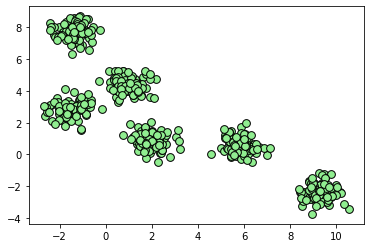

In [4]:
#Generación de los datos

#Cantidad de muestras a generar
num_samples = 500

#Número de clústes a generar
num_clusters = 6

# se crean los datos aleatoriamente
X, y = make_blobs(
   n_samples=num_samples, n_features=2,
   centers=num_clusters, cluster_std=0.5,
   shuffle=True, random_state=0
)

# Se grafican los datos
plt.scatter(
   X[:, 0], X[:, 1],
   c='lightgreen', marker='o',
   edgecolor='black', s=60
)
plt.show()

## 1.1 Implementación de Algoritmo K-Means

In [5]:
"""
Se recaluclan los clusters ya que se inicializan de forma algo aleatoria, 
se deben moverlos lentamente hacia la forma más ideal de segmentar los datos de forma natural 
"""
def recalculate_clusters(X, centroids, k):
    # Se inicializan los cluster en vacio 
    clusters = {}
    # Se coloca el valor de k para obtener el rango de los clusters
    for i in range(k):
        clusters[i] = []
    # Se coloca los puntos en el plot utilizando el dataframe y el vector norm (maginitud/largo)
    for data in X:
        # Se prepara la lista de la distancia euclidiana y se itera sobre ella
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))
        #Se agrega el cluster de datos a el diccionario 
        clusters[euc_dist.index(min(euc_dist))].append(data)
    return clusters    

"""
Se recaluclan los centroides ya que se inicializan de forma algo aleatoria, 
se deben moverlos lentamente hacia la forma más ideal de segmentar los datos de forma natural 
"""
def recalculate_centroids(centroids, clusters, k):
    for i in range(k):
        # Encuentra el promedio del clúster en un índice dado
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

"""
Grafica los clusters.
"""
def plot_clusters(centroids, clusters, k):
    colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']
    plt.figure(figsize = (6, 4))  
    area = (20) ** 2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % k], alpha=0.6)          
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200)

"""
Realiza el proceso de el algoritmo de k-means.
Recalculando los clusters y centroides hasta que se terminen las repeticiones indicadas.
Grafica la primera y ultima iteracion dada.
"""
def k_means_clustering(X, centroids, k, repeats):
    for i in range(k):
        # Configura los centroides según los datos
        centroids[i] = X[i]

    # Muestra los centroides y los clústeres recalculados.
    print(f'First and last of {repeats} iterations')
    for i in range(repeats):        
        clusters = recalculate_clusters(X, centroids, k)  
        centroids = recalculate_centroids(centroids, clusters, k)

        # Grafica la primera y última iteración de kmeans dadas las repeticiones especificadas
        if i == range(repeats)[-1] or i == range(repeats)[0]:
            plot_clusters(centroids, clusters, k)

### Visualización de los datos K-Means

First and last of 20 iterations


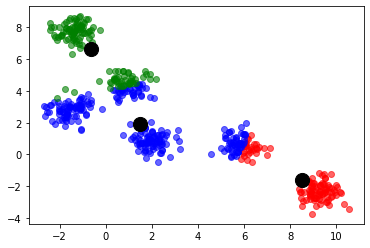

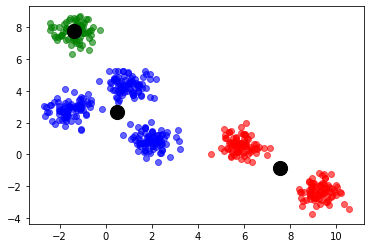

In [6]:
k_means_clustering(X,{},3,20)

## 1.2 Implementación de Algoritmo DBSCAN

In [7]:
"""
     DBSCAN toma un conjunto de datos D, una distancia de umbral
     eps, y un número requerido de puntos MinPts.
    
     Devolverá una lista de etiquetas de clúster. La etiqueta -1 significa un punto de ruido y luego
     los grupos se numeran empezando por 1.
"""

def DBSCAN(D, eps, MinPts):

 
   # Esta lista contendrá la asignación de cluster final para cada punto en D.
    labels = [0]*len(D)

    # C es el id del cluster actual.    
    C = 0
    
    
    # Este for es responsable de seleccionar nuevos puntos semilla, 
    # un punto desde el cual se creara un nuevo clúster.
    for P in range(0, len(D)):
    
        # Si la etiqueta del punto no es 0, continúe con el siguiente punto.
        if not (labels[P] == 0):
           continue
        
        # Encuentra todos los puntos vecinos de P.
        NeighborPts = regionQuery(D, P, eps)
        
        # Si el número está por debajo de MinPts, este punto es ruido.
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        #Sino se utiliza los puntos para una semilla de un nuevo cluster
        else: 
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    return labels

"""
Crea un nuevo cluster con la etiqueta C a partir del punto de semilla P.
"""
def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):


    # Asigna la etiqueta del clúster al punto de semilla.
    labels[P] = C
    
    # Busca a cada vecino de P.
    i = 0
    while i < len(NeighborPts):    
            
        Pn = NeighborPts[i]
       
        # Si el punto fue etiquetado como ruido se convierte
        # en un punto de hoja del cluster C y sigue adelante.
        if labels[Pn] == -1:
           labels[Pn] = C
        #Si Pn no ha sido revisado, se reclama como parte de C.
        elif labels[Pn] == 0:
           
            labels[Pn] = C
            
            PnNeighborPts = regionQuery(D, Pn, eps)
            
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
   
        i += 1        
    


"""
Esta función calcula la distancia entre un punto P y cualquier otro punto en el conjunto de datos,
y luego devuelve solo aquellos puntos que están dentro de una distancia umbral "eps".
"""
def regionQuery(D, P, eps):
 
    neighbors = []
    
    # Para cada punto en el dataframe
    for Pn in range(0, len(D)):
        
        # Si la distancia está por debajo del umbral, agréguelo a la lista de vecinos.
        if np.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

### Visualización de los datos K-Means

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

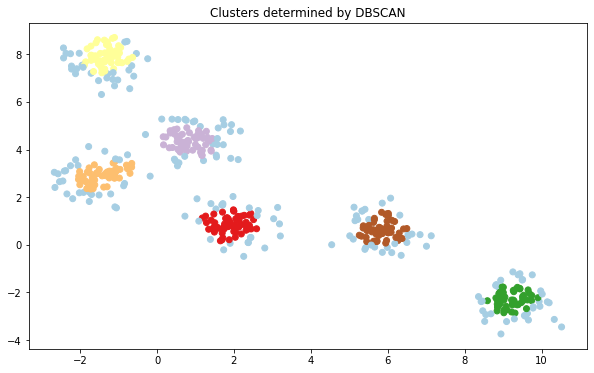

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=DBSCAN(X,0.4,20), cmap='Paired')
plt.title("Clusters determined by DBSCAN")

# Ejercicio 2. Aplicación de los algoritmos de clustering implementados en la sección anterior para caracterizar la criminalidad en Costa Rica a partir de datos del Organismo de Investigación Judicial (OIJ) y el Instituto Nacional de Estadística y Censos (INEC).

### 2.1 Apertura y preprocesamiento de datos.

In [25]:
dfInec = pd.read_csv(r'EstadisticasINEC.csv')
dfOij = pd.read_csv(r'EstadisticasOIJ.csv')


#Se eliminan espacios en blanco
dfInec['provincia_canton_distrito'] = dfInec['provincia_canton_distrito'].str.strip()

#Se eliminan filas vacias
dfInec = dfInec.dropna()

#Se pasan los datos a mayusculas para que sean iguales a los de oij
dfInec['provincia_canton_distrito'] = dfInec['provincia_canton_distrito'].str.upper()

#Se remueven acentos en los distritos
def remove_accents(a):
    return unidecode.unidecode(a)

dfInec['provincia_canton_distrito'] = dfInec['provincia_canton_distrito'].apply(remove_accents)

#Se muestran los datos normalizados
dfInec.head()


,provincia_canton_distrito,Población de 15 años y más,Tasa neta de participación,Tasa de ocupación,Tasa de desempleo abierto,Porcentaje de población económicamente inactiva,Relación de dependencia económica
1,COSTA RICA,3 233 882,53.5,51.7,3.4,46.5,1.5
3,SAN JOSE,1 087 315,56.0,54.1,3.5,44.0,1.3
5,SAN JOSE,225 856,56.7,54.5,3.9,43.3,1.2
7,CARMEN,2 431,56.3,54.8,2.7,43.7,1.0
8,MERCED,9 655,59.2,57.0,3.8,40.8,1.1


### 2.2 Seleccione las variables distrito, cantidad de delitos por distrito y tasa de desempleo abierto por distrito. Debe realizar un conteo de los delitos por distrito. 

SAN JOSE         3064
ALAJUELA         1023
HEREDIA           698
POCOCI            649
PEREZ ZELEDON     569
                 ... 
NANDAYURE          13
HOJANCHA           13
GUANACASTE         12
ZARCERO            10
SAN MATEO          10
Name: Distrito, Length: 84, dtype: int64


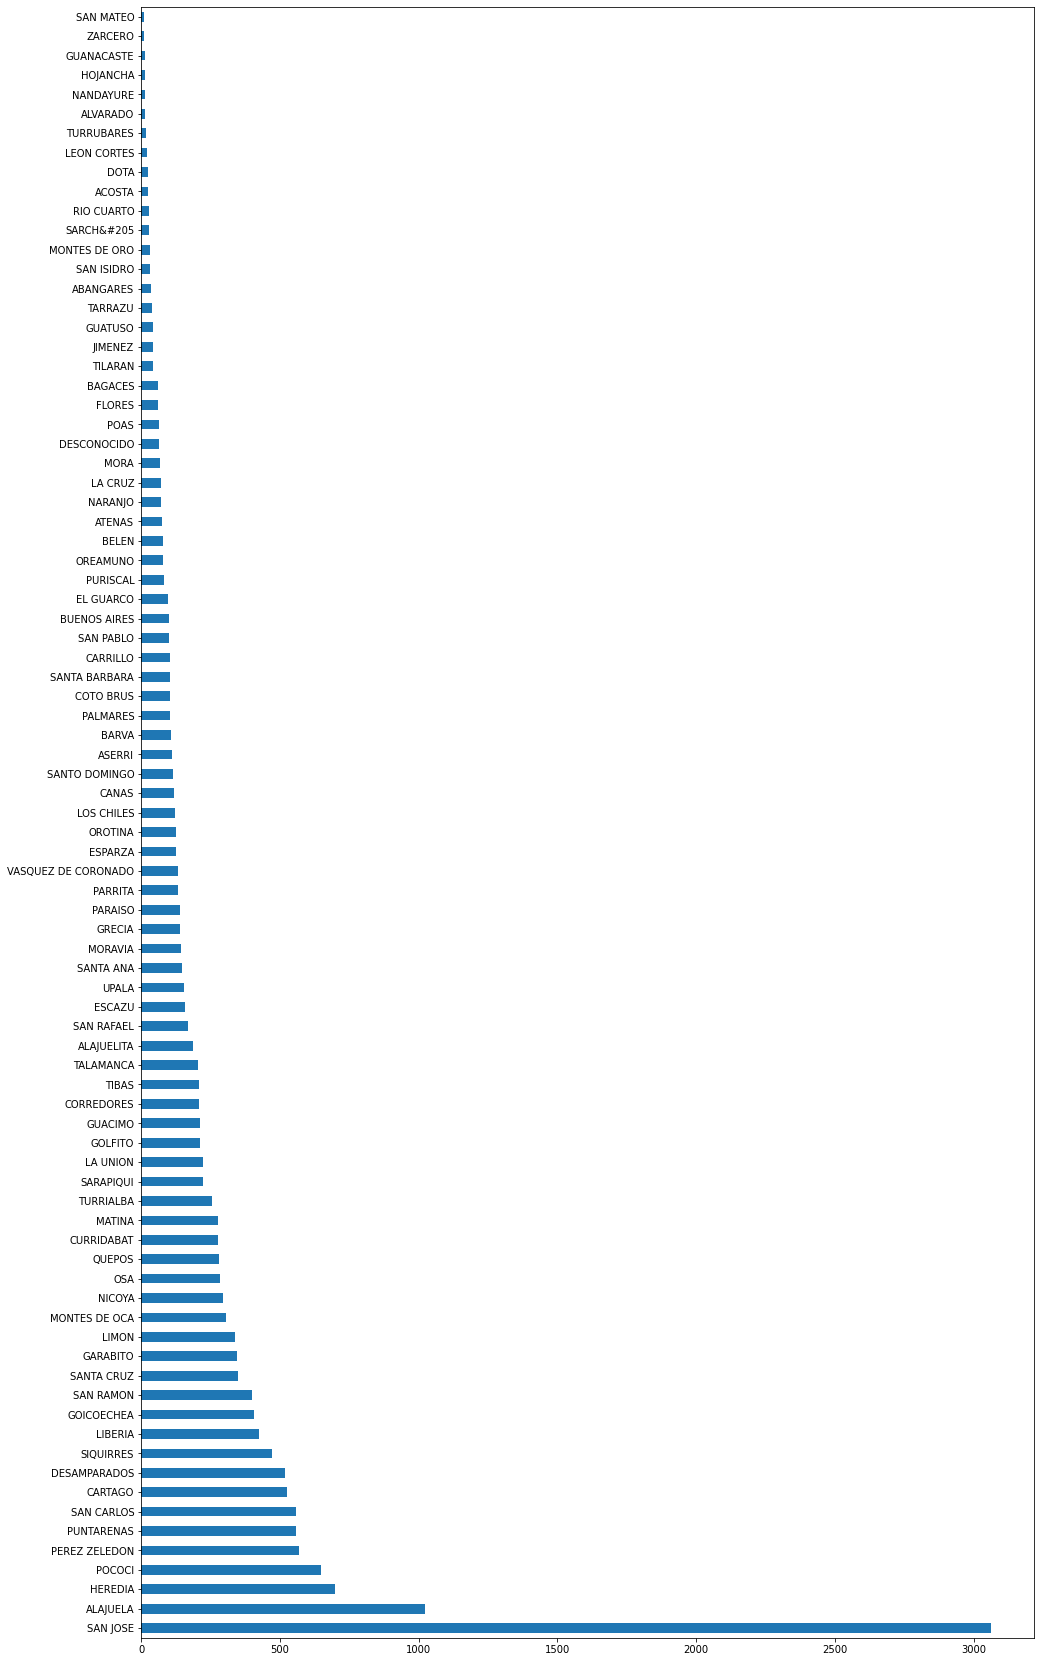

In [10]:
print(dfOij['Distrito'].value_counts())

ax = dfOij['Distrito'].value_counts().plot.barh(x='Distrito', y='count', rot=0,figsize=(16,30))

### Preparación de los datos del dataframe cantidad de delitos - tasa de desempleo

In [11]:
cant_del = dfOij['Distrito'].value_counts()
Z = []

distritos = dfOij['Distrito'].tolist()

for i,j in zip(dfInec['provincia_canton_distrito'],dfInec['Tasa de desempleo abierto']):
    temp = []
    if i in distritos:
        temp.append([cant_del[i],float(j)])
        Z.append(temp[0])
        temp = []
        
arr = np.array(Z)

### 2.3 Caracterización de los datos usando las variables cantidad de delitos por distrito y tasa de desempleo abierto por distrito con K-means.

First and last of 20 iterations


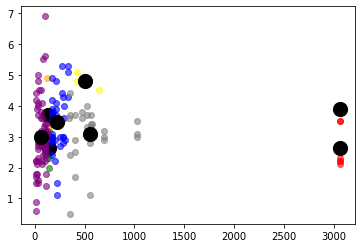

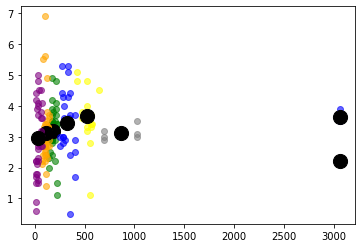

In [12]:
k_means_clustering(arr,{},8,20)

### 2.4 Método del codo para seleccionar el mejor K.

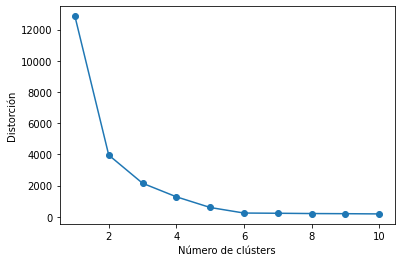

First and last of 20 iterations


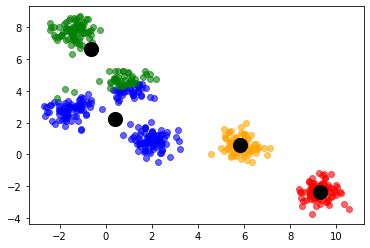

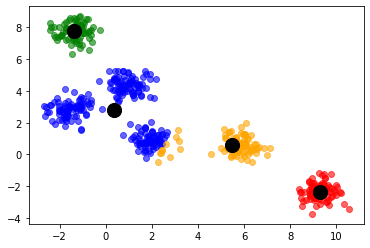

In [13]:
# Se calula el mejor k con el Algoritmo del Codo.
# calculamos la distorcion para diferentes k 

# Se calcula el error cuadrado con k diferentes (distorción)
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clústers')
plt.ylabel('Distorción')
plt.show()

k_means_clustering(X,{},4,20)

### 2.5 Como evaluar el algoritmo K-means.

Al investigar encontramos que para validacion de clustering existen dos tipos:
La validacion externa y la validacion interna.

Validacion interna: La validacion interna trata de medir la estructura del clustering sin necesidad de informacion ajena al algoritmo y su resultado.
Validacion externa: La validacion externa mide de manera similar a la interna solamente que basandose en informacion externa ya conocida.

### Metricas de Validacion Interna.

Validacion interna tiene dos metricas:

Cohesion: Los miembros del mismo cluster deben de estar los mas cercano posible entre ellos. 
Esta metrica puede ser evaluada mediante la medida SSW (Sum of Squared Within).
Sepracion: Se refiere a que los cluster deben de estar ampliamente separados. 
Esta metrica puede ser evaluada mediante la medida SSB (Sum of Squared Between).

Estas metricas pueden ser usadaas en Sum of Squares based indexes para resultar con una medida de dispersion. Cabe mencionar que existen
tambien otros tipos de indices como el Davies-Bouldin (DB) y el Coeficiente de Silhouette.

### Metricas de Validacion Externa.

Se va utilizar una tabla de verdades en las cuales comparamos la verdad que se conoce de antemano con la hipotesis producida por el algoritmo.
Las columnas serian las verdades y las filas las hipotesis, ahora bien aquellos puntos donde coinciden la verdad y la hipotesis se marcara como
un verdadero positivo. Aquellas donde la hipotesis no coincidio con la verdad se marcaria como falso positivo. Luego similarmente aquellos
elementos de un cluster i que fueron ubicados en un cluster diferente al de su etiqueta son falsos negativos. Por ultimo verdaderi negativo a
aquellos que fueron puestos correctamente fuera de un cluster.

A partir de estas tablas entonces se pueden utilizar las metricas Precision y el Recall.
La precision puede ser calculada mediante la division de los verdaderos positivos entre los verdaderos positivos mas falsos positivos.
El recall se puede ser calculada mediante la division de los verdaderos positivos entre los verdaderos positivos mas falsos negativos.

#### Medida F

Esta se da en función de las dos métrica ya vistas y puede ser interpretada como la media harmónica de ambas. En particular la medida F maneja un parámetro α de
la siguiente manera:

-α = 1: media harmonoica

-α ε (0:1) preferencia por la precisión

-α > 1 preferencia por el recall

Dando como resultado la siguiente formula:

𝐹α = $\frac{1 + α }{\frac{1}{presicion}+\frac{α}{recall}}$

Existen tambien otras metricas externas utilizables son los llamados Entropia y Pureza

### 2.6 Caracterización de los datos usando las variables cantidad de delitos por distrito y tasa de desempleo abierto por distrito con DBSCAN.

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

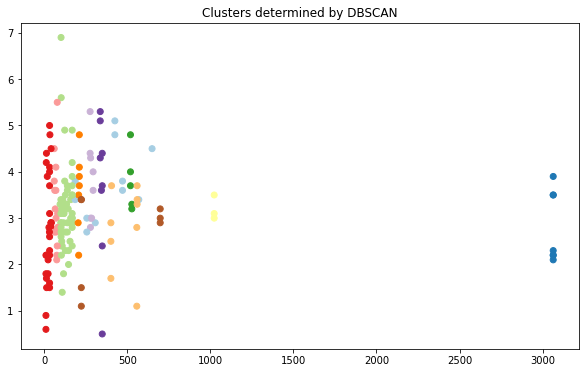

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(arr[:,0], arr[:,1],c=DBSCAN(arr,10,3), cmap='Paired')
plt.title("Clusters determined by DBSCAN")

---

# Seccion 2

## PCA

In [62]:
dfInec = pd.read_csv(r"EstadisticasINEC.csv")
dfInec.dropna()

features = list(dfInec.columns.values)
print(dfInec.columns.values , "\n")
# Se normaliza
x = dfInec.loc[1:, features[3:8]].values
stdSc = StandardScaler()
x = stdSc.fit_transform(x) 

['provincia_canton_distrito' 'Población de 15 años y más'
 'Tasa neta de participación' 'Tasa de ocupación'
 'Tasa de desempleo abierto'
 'Porcentaje de población económicamente inactiva'
 'Relación de dependencia económica'] 



In [47]:
new_cols = ['feature'+str(i) for i in range(x.shape[1])]
df  = pd.DataFrame(x,columns= new_cols)

,feature0,feature1,feature2,feature3
725,0.063396,0.687310,-0.134935,0.112751
726,-1.819565,1.114121,1.754501,1.101083
727,-0.376548,1.284846,0.246419,0.359834
728,-0.517330,0.601948,0.471764,0.854000
729,-0.200571,1.199484,0.073076,0.606917


In [48]:
df.head()

,feature0,feature1,feature2,feature3
0,0.344960,0.260499,-0.377615,-0.381415
1,NaN,NaN,NaN,NaN
2,0.767306,0.345862,-0.810972,-0.875581
3,NaN,NaN,NaN,NaN
4,0.837697,0.687310,-0.932312,-1.122665


In [49]:
df.tail()

,feature0,feature1,feature2,feature3
725,0.063396,0.687310,-0.134935,0.112751
726,-1.819565,1.114121,1.754501,1.101083
727,-0.376548,1.284846,0.246419,0.359834
728,-0.517330,0.601948,0.471764,0.854000
729,-0.200571,1.199484,0.073076,0.606917


In [63]:
print("La forma de la data antes ",dfInec.shape)
x = np.nan_to_num(x)
pca = PCA(n_components=4)
components = pca.fit_transform(x)
componentsDF = pd.DataFrame(data =components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

print("La forma de la data despues", components.shape)

La forma de la data antes  (731, 7)
La forma de la data despues (730, 4)


In [53]:
componentsDF.head()

,PC1,PC2,PC3,PC4
0,-5.959191e-01,3.457232e-01,-1.685693e-02,-5.358315e-05
1,-8.377534e-17,-7.294936e-17,5.344283e-16,9.825321e-17
2,-1.355787e+00,5.372930e-01,-7.644593e-02,3.513597e-03
3,-8.070343e-16,-2.486188e-16,-9.109699e-16,3.288579e-16
4,-1.558940e+00,9.139776e-01,-1.949974e-01,-6.422332e-03


In [54]:
componentsDF.tail()

,PC1,PC2,PC3,PC4
725,0.042195,0.685981,0.187042,-0.000592
726,2.831910,0.749228,-0.511335,0.014707
727,0.735957,1.198335,0.071893,-0.003500
728,1.132299,0.447064,0.316014,0.004226
729,0.661752,1.115112,0.413813,-0.006813


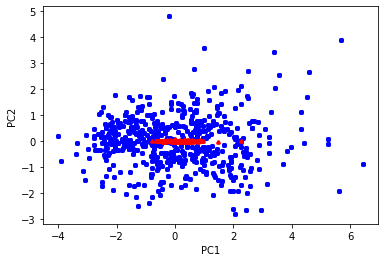

In [61]:
x1 = componentsDF['PC1'].tolist()
y1 = componentsDF['PC2'].tolist()
x2 = componentsDF['PC3'].tolist()
y2 = componentsDF['PC4'].tolist()
# Graficamos 
plt.scatter(x1, y1, c ="green",
			linewidths = 3,
			marker ="s",
			edgecolor ="blue",
			s = 3)
plt.scatter(x2, y2, c ="yellow",
			linewidths = 3,
			marker ="^",
			edgecolor ="red",
			s = 3)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Conclusiones

- El PCA nos permite reducir el ruido que tiene la informacion que queremos analizar

- Gracias al PCA podemos disminuir las dimesiones de la data en este caso a 4

- Debido a que el PCA reduce la cantidad de dimensiones de los datos, podemos utilizarlo como un paso anterior a otros algoritmos de aprendizaje automatico puesto que en teoria deberia de mejorar los tiempos de dichos algoritmos. 



